In [10]:
import numpy as np
T = 10
emax = 8
e = [2, 4, 5]
m = 3
p = [1.0, 0.7, 0.8]
q = [0.5, 0.8 ,0.7]
S = np.array([i for i in range(emax+1)])
n = len(S)
P = np.zeros((m, n, n)) ##(生息地の数、移動前エネルギー、移動後エネルギー)
for k in range(m):
    P[k, 0, 0] = 1
    for i in range(1,emax+1):
        P[k, i, 0] = P[k, i, 0] + 1-p[k]
        P[k, i, i-1] = P[k, i, i-1] + p[k]*(1-q[k])
        next_ene = min(emax, i-1+e[k])
        P[k, i, next_ene] = P[k, i, next_ene] + p[k]*q[k]
print(P)

[[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.5  0.   0.5  0.   0.   0.   0.   0.   0.  ]
  [0.   0.5  0.   0.5  0.   0.   0.   0.   0.  ]
  [0.   0.   0.5  0.   0.5  0.   0.   0.   0.  ]
  [0.   0.   0.   0.5  0.   0.5  0.   0.   0.  ]
  [0.   0.   0.   0.   0.5  0.   0.5  0.   0.  ]
  [0.   0.   0.   0.   0.   0.5  0.   0.5  0.  ]
  [0.   0.   0.   0.   0.   0.   0.5  0.   0.5 ]
  [0.   0.   0.   0.   0.   0.   0.   0.5  0.5 ]]

 [[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.44 0.   0.   0.   0.56 0.   0.   0.   0.  ]
  [0.3  0.14 0.   0.   0.   0.56 0.   0.   0.  ]
  [0.3  0.   0.14 0.   0.   0.   0.56 0.   0.  ]
  [0.3  0.   0.   0.14 0.   0.   0.   0.56 0.  ]
  [0.3  0.   0.   0.   0.14 0.   0.   0.   0.56]
  [0.3  0.   0.   0.   0.   0.14 0.   0.   0.56]
  [0.3  0.   0.   0.   0.   0.   0.14 0.   0.56]
  [0.3  0.   0.   0.   0.   0.   0.   0.14 0.56]]

 [[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.44 0.   0.   0.   0.   0.56 0.   0.   0.  ]
  [0.2  0.24 0. 

In [11]:
v = np.zeros((T, emax+1))
for i in range(1, emax+1):
    v[T-1, i] = 1
print(v)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [12]:
x = np.zeros((T, emax+1))
def iteration():
    k = 0
    for t in range(T-1):
        v[T-2-t] = np.maximum(P[0]@v[T-1-t], P[1]@v[T-1-t], P[2]@v[T-1-t])
        x[T-2-t] = np.argmax([P[0]@v[T-1-t], P[1]@v[T-1-t], P[2]@v[T-1-t]], axis=0)
    return v, x


In [13]:
iteration()

(array([[0.        , 0.486619  , 0.6495125 , 0.7592375 , 0.8689625 ,
         0.9190125 , 0.9690625 , 0.9828125 , 0.99484375],
        [0.        , 0.5061    , 0.6495125 , 0.792925  , 0.8689625 ,
         0.945     , 0.9690625 , 0.993125  , 0.9965625 ],
        [0.        , 0.5061    , 0.6821    , 0.792925  , 0.90375   ,
         0.945     , 0.98625   , 0.993125  , 1.        ],
        [0.        , 0.5292    , 0.6821    , 0.835     , 0.90375   ,
         0.9725    , 0.98625   , 1.        , 1.        ],
        [0.        , 0.5292    , 0.725     , 0.835     , 0.945     ,
         0.9725    , 1.        , 1.        , 1.        ],
        [0.        , 0.56      , 0.725     , 0.89      , 0.945     ,
         1.        , 1.        , 1.        , 1.        ],
        [0.        , 0.56      , 0.78      , 0.89      , 1.        ,
         1.        , 1.        , 1.        , 1.        ],
        [0.        , 0.56      , 0.78      , 1.        , 1.        ,
         1.        , 1.        , 1.       

In [14]:
[V, X] = iteration()

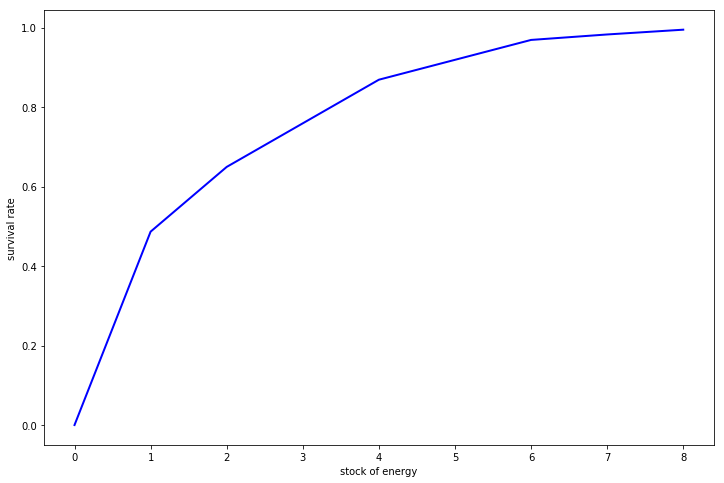

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
x = S
y = V[0]
ax.plot(x, y, 'b-', lw=2)
ax.set_xlabel("stock of energy")
ax.set_ylabel("survival rate")
plt.show()

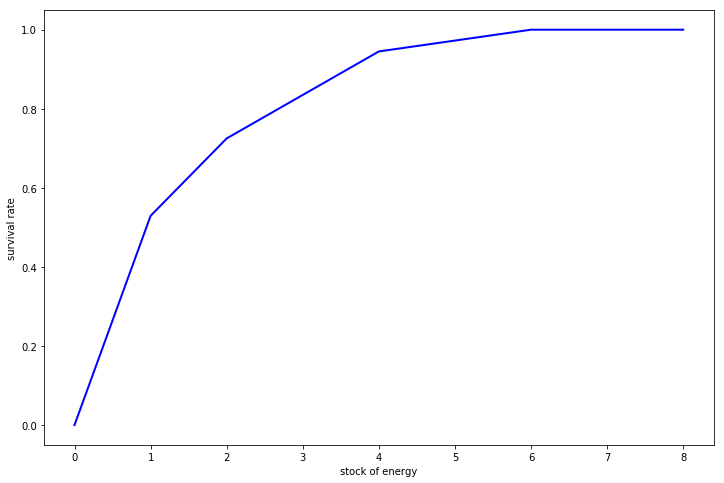

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
x = S
y = V[4]
ax.plot(x, y, 'b-', lw=2)
ax.set_xlabel("stock of energy")
ax.set_ylabel("survival rate")
plt.show()

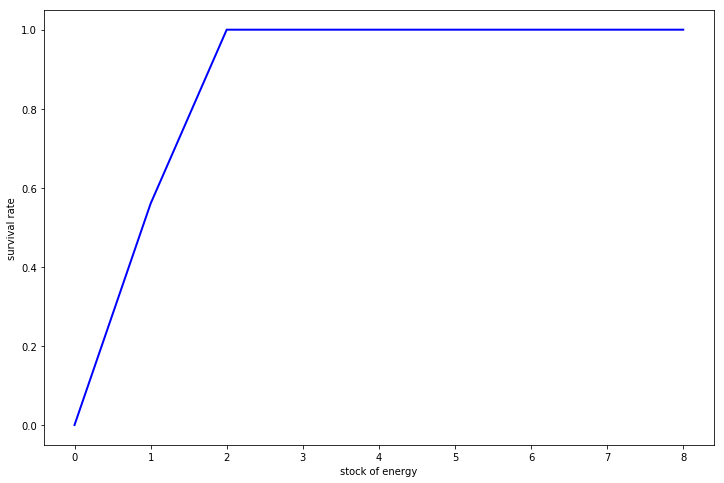

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
x = S
y = V[8]
ax.plot(x, y, 'b-', lw=2)
ax.set_xlabel("stock of energy")
ax.set_ylabel("survival rate")
plt.show()